In [1]:
import os

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
# Create a data frame from the college scorecard cohorts-institutions CSV file.

institutions_filename = '../data/Most-Recent-Cohorts-Institution.csv.gz'
institutions_df = pd.read_csv(institutions_filename,
                usecols=['OPEID6', 
                         'INSTNM', 'CITY', 'STABBR', 
                         'FTFTPCTPELL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'ADM_RATE', 
                         'NPT4_PUB', 'NPT4_PRIV',
                         'NPT41_PUB', 'NPT41_PRIV',
                         'NPT45_PUB', 'NPT45_PRIV', 
                         'MD_EARN_WNE_P10', 'C100_4'])

In [3]:
institutions_df.head()

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563
2,25034,Amridge University,Montgomery,AL,NaN,NaN,17618.0,NaN,NaN,17385.0,NaN,6950.0,6950.0,37895.0,0.2500,0.6667
3,1055,University of Alabama in Huntsville,Huntsville,AL,0.7711,17208.0,NaN,13631.0,19862.0,NaN,NaN,11338.0,23734.0,54361.0,0.3109,0.2304
4,1005,Alabama State University,Montgomery,AL,0.9888,19534.0,NaN,19581.0,17559.0,NaN,NaN,11068.0,19396.0,32084.0,0.1462,0.7590


In [4]:
# Load the CSV file for fields of study into another data frame

fields_filename = '../data/FieldOfStudyData1718_1819_PP.csv.gz'

fields_of_study_df = pd.read_csv(fields_filename,
                                usecols=['OPEID6', 'INSTNM', 'CREDDESC', 'CIPDESC', 'CONTROL'])

In [5]:
fields_of_study_df.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


In [6]:
# What state has the greatest number of universities in this database?
institutions_df.groupby('STABBR')['OPEID6'].count().sort_values(ascending=False).head(1)

STABBR
CA    705
Name: OPEID6, dtype: int64

In [7]:
# What city+state has the greatest number of universities in this database?
institutions_df.groupby(['STABBR', 'CITY'])['OPEID6'].count().sort_values(ascending=False).head(1)

STABBR  CITY    
NY      New York    81
Name: OPEID6, dtype: int64

In [8]:
# How much memory can we save if we set the CITY and STABBR columns in institutions_df to be categories?
pre_category_memory = institutions_df.memory_usage(deep=True).sum()
print(f'{pre_category_memory:,}')

2,105,659


In [9]:
institutions_df['CITY'] = institutions_df['CITY'].astype('category')
institutions_df['STABBR'] = institutions_df['STABBR'].astype('category')

post_category_memory = institutions_df.memory_usage(deep=True).sum()

savings = pre_category_memory - post_category_memory
print(f'{savings:,}')

579,371


<AxesSubplot:ylabel='Frequency'>

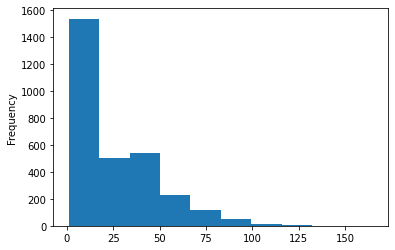

In [10]:
# Create a histogram showing how many bachelor programs universities offer
fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree'].groupby('INSTNM')['CIPDESC'].count().plot.hist()

In [11]:
# Which university offers the greatest number of bachelor programs?
fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree'].groupby('INSTNM')['CIPDESC'].count().sort_values(ascending=False).head(10)

INSTNM
Westminster College                          165
Pennsylvania State University-Main Campus    141
University of Washington-Seattle Campus      137
Ohio State University-Main Campus            126
Bethel University                            125
University of Minnesota-Twin Cities          116
Arizona State University Campus Immersion    116
University of Arizona                        116
Anderson University                          114
Purdue University-Main Campus                114
Name: CIPDESC, dtype: int64

<AxesSubplot:ylabel='Frequency'>

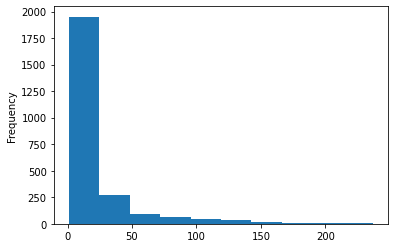

In [12]:
# Create a histogram showing how many graudate (master's and doctoral) programs universities offer
fields_of_study_df.loc[fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])].groupby('INSTNM')['CIPDESC'].count().plot.hist()

In [13]:
# Which university offers the greatest number of different graduate (master + doctoral) programs?
fields_of_study_df.loc[fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])].groupby('INSTNM')['CIPDESC'].count().sort_values(ascending=False).head(10)

INSTNM
University of Washington-Seattle Campus      237
Pennsylvania State University-Main Campus    230
New York University                          226
University of Minnesota-Twin Cities          205
Ohio State University-Main Campus            200
University of Southern California            199
Arizona State University Campus Immersion    199
University of Arizona                        195
University of Florida                        194
University of Illinois Urbana-Champaign      190
Name: CIPDESC, dtype: int64

In [40]:
# How many universities offer bachelor's degrees, but not master's or doctorates?

ug_schools = fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree', 'INSTNM']
grad_schools = fields_of_study_df.loc[fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"]), 'INSTNM']

ug_schools[~ug_schools.isin(grad_schools)].unique().size

923

In [15]:
# How many universities offer master's and doctoral degrees, but not bachelors?
grad_schools[~grad_schools.isin(ug_schools)].unique().size

404

In [46]:
# How many institutions offer bachelor's degrees whose name contains the term "Computer Science"?

fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                       (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), 'INSTNM'].unique().size

762

In [49]:
# The CONTROL field describes the types of institutions in the database.
# How many of each type offer a computer-science program?

fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                       (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['CONTROL','INSTNM']].groupby('CONTROL').count()

,INSTNM
CONTROL,
Foreign,32
"Private, for-profit",18
"Private, nonprofit",501
Public,273


<AxesSubplot:ylabel='INSTNM'>

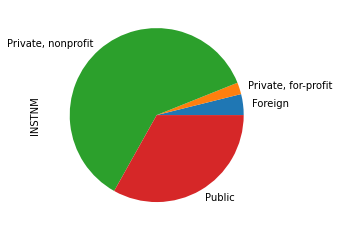

In [18]:
# Create a pie chart showing the different types of institutions that offer CS degrees
fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                       (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['CONTROL','INSTNM']].groupby('CONTROL').count()['INSTNM'].plot.pie()

In [19]:
# What are the minimum, median, mean, and maximum tuitions for an undergrad CS degree?  
# (We'll define this as a bachelor's program with the phrase "Computer Science" in the name.)
# When comparing tuition, use TUITIONFEE_OUT for all schools.

comp_sci_universities = fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                           (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['OPEID6','CONTROL','INSTNM']].set_index('OPEID6')

comp_sci_universities.join(institutions_df[['OPEID6', 'TUITIONFEE_OUT']].set_index('OPEID6'))['TUITIONFEE_OUT'].describe()

count     1139.000000
mean     26996.482002
std      14903.734488
min       3154.000000
25%      13202.500000
50%      24320.000000
75%      37836.000000
max      61671.000000
Name: TUITIONFEE_OUT, dtype: float64

In [56]:
# Describe the tuition again, but grouped by the different types of universities ("CONTROL")

comp_sci_universities = fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                           (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['OPEID6','CONTROL','INSTNM']].set_index('OPEID6')

comp_sci_universities.join(institutions_df[['OPEID6', 'TUITIONFEE_OUT']].set_index('OPEID6')).groupby('CONTROL')['TUITIONFEE_OUT'].describe().dropna().T

CONTROL,"Private, for-profit","Private, nonprofit",Public
count,136.000000,582.000000,421.000000
mean,12359.161765,33789.982818,22333.437055
std,1954.582965,15973.754351,9618.584458
min,8280.000000,4300.000000,3154.000000
25%,12054.000000,20260.000000,15636.000000
50%,12233.000000,34245.000000,21312.000000
75%,12233.000000,47128.500000,27540.000000
max,25820.000000,61671.000000,47220.000000


In [21]:
# What is the correlation between admission rate and tuition cost?
# How would you interpret this?

institutions_df[['ADM_RATE', 'TUITIONFEE_OUT']].corr()

,ADM_RATE,TUITIONFEE_OUT
ADM_RATE,1.000000,-0.309658
TUITIONFEE_OUT,-0.309658,1.000000


<AxesSubplot:xlabel='TUITIONFEE_OUT', ylabel='ADM_RATE'>

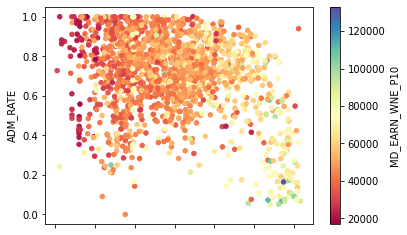

In [22]:
# Create a scatter plot in which tuition is on the x axis, and admission rate is on the y axis,
# the median earnings after 10 years are used for colorizing, and we use the "Spectral" colormap.
# Where do the lowest-paid graduates show up on the graph?

institutions_df.plot.scatter(x='TUITIONFEE_OUT', y='ADM_RATE', 
                             c='MD_EARN_WNE_P10', 
                             colormap='Spectral')

In [23]:
# Which universities are in the top 25% of tuition, and also the top 25% of percentage with Pell grants?
# Print only the institution name, city, and state, ordered by institution name

institutions_df.loc[(institutions_df['TUITIONFEE_OUT'] > institutions_df['TUITIONFEE_OUT'].quantile(0.75)) &
                    (institutions_df['FTFTPCTPELL'] > institutions_df['FTFTPCTPELL'].quantile(0.75)),
                    ['INSTNM', 'CITY', 'STABBR']].sort_values(by='INSTNM')

,INSTNM,CITY,STABBR
5491,Antioch College,Yellow Springs,OH
1206,Berea College,Berea,KY
1930,Berkeley College-Woodland Park,Woodland Park,NJ
1932,Bloomfield College,Bloomfield,NJ
2334,Chowan University,Murfreesboro,NC
1543,Dorsey College,Madison Heights,MI
3758,Dorsey College-Roseville,Roseville,MI
5138,Dorsey College-Saginaw,Saginaw,MI
3734,Dorsey College-Wayne,Wayne,MI
1542,Dorsey School of Business-Madison Heights,Madison Heights,MI


In [57]:
# NPT4_PUB indicates the average net price for public institutions (in-state tuition)
# and NPT4_PRIV for private institutions.  

# NPT41_PUB and NPT45_PUB show the average price paid by people in the lowest income
# bracket (1) vs. the highest income bracket (5) at public institutions.

# NPT41_PRIV and NPT45_PRIV show the average price paid by people in the lowest income
# bracket (1) vs. the highest income bracket (5) at private institutions.

# In how many institutions does the bottom quintile receive money (i.e., is the 
# value negative)?

# Using logical "or" with |
institutions_df.loc[((institutions_df['NPT41_PUB'] < 0) |
                     (institutions_df['NPT41_PRIV'] < 0)), 'INSTNM'].count()

12

In [62]:
# Using .add
institutions_df.loc[institutions_df['NPT41_PUB'].add(institutions_df['NPT41_PRIV'], fill_value=0) < 0,
                   'INSTNM'].count()

12

In [25]:
# What is the average proportion that the bottom quintile pays vs. the top quintile, in public universities?

(institutions_df['NPT41_PUB'] / institutions_df['NPT45_PUB']).mean()

0.5233221766529079

In [26]:
# What is the average proportion that the bottom quintile pays vs. the top quintile, in private universities?

(institutions_df['NPT41_PRIV'] / institutions_df['NPT45_PRIV']).mean()

0.714905619436487

In [64]:
# Let's try to figure out which universities offer the best overall ROI (across all disciplines).
# What schools are in the cheapest 25%, but 10 years after graduation, students have the top 25% of salaries?


# First, public institutions
institutions_df.loc[(institutions_df['NPT4_PUB'] <= institutions_df['NPT4_PUB'].quantile(0.25)) &
                    (institutions_df['MD_EARN_WNE_P10'] >= institutions_df['MD_EARN_WNE_P10'].quantile(0.75)),
                   ['INSTNM', 'STABBR', 'CITY']].sort_values(by=['STABBR', 'CITY'])

,INSTNM,STABBR,CITY
203,California State University-Dominguez Hills,CA,Carson
267,De Anza College,CA,Cupertino
208,California State University-Los Angeles,CA,Los Angeles
363,Moorpark College,CA,Moorpark
228,Canada College,CA,Redwood City
450,Skyline College,CA,San Bruno
432,College of San Mateo,CA,San Mateo
652,University of Florida,FL,Gainesville
5563,University of Florida-Online,FL,Gainesville
645,Florida International University,FL,Miami


In [66]:
# How about private institutions?

institutions_df.loc[(institutions_df['NPT4_PRIV'] <= institutions_df['NPT4_PRIV'].quantile(0.25)) &
                    (institutions_df['MD_EARN_WNE_P10'] >= institutions_df['MD_EARN_WNE_P10'].quantile(0.75)),
                   ['INSTNM', 'STABBR', 'CITY']].sort_values(by=['STABBR', 'CITY'])

,INSTNM,STABBR,CITY
4795,Columbia Southern University,AL,Orange Beach
3695,Stanford University,CA,Stanford
4208,Mercy Hospital School of Practical Nursing-Pla...,FL,Miami
842,Brigham Young University-Idaho,ID,Rexburg
895,Graham Hospital School of Nursing,IL,Canton
978,Saint Xavier University,IL,Chicago
1011,Calumet College of Saint Joseph,IN,Whiting
1297,University of Holy Cross,LA,New Orleans
1448,Harvard University,MA,Cambridge
1383,Ner Israel Rabbinical College,MD,Baltimore


In [29]:
# Is there a correlation between admission rates and completion rates?  If a school is highly
# selective, are students more likely to graduate?

institutions_df[['C100_4', 'ADM_RATE']].corr()

,C100_4,ADM_RATE
C100_4,1.000000,-0.336871
ADM_RATE,-0.336871,1.000000


In [31]:
# Ten years after graduating, from what kinds of schools (private, for-profit, private non-profit,
# or public) do people earn, on average, the greatest amount?

institutions_df[['OPEID6', 'MD_EARN_WNE_P10']].set_index('OPEID6').join(fields_of_study_df.groupby('OPEID6')['CONTROL'].min()).groupby('CONTROL').mean()

,MD_EARN_WNE_P10
CONTROL,
"Private, for-profit",30474.754943
"Private, nonprofit",48530.408744
Public,40314.442820


In [32]:
# Do people who graduate from "Ivy Plus" schools earn more than the average private-school
# university graduate?  If so, then how much more?

institutions_df.loc[institutions_df['INSTNM'].isin(['Harvard University', 
                               'Massachusetts Institute of Technology',
                                                   'Yale University',
                                                   'Columbia University in the City of New York',
                                                   'Brown University',
                                                   'Stanford University',
                                                   'University of Chicago',
                                                   'Dartmouth College',
                                                   'University of Pennsylvania',
                                                   'Cornell University',
                                                   'Princeton University']), 'MD_EARN_WNE_P10'].mean()

91806.81818181818

In [33]:
# Do people studying at universities in particular states earn, on average, more 
# after 10 years?

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10'].mean().sort_values(ascending=False)

STABBR
MA    53234.396226
RI    50432.789474
DC    49081.470588
CT    48662.017857
VT    48383.857143
NY    47584.653199
NH    46540.791667
WA    44594.678161
PA    44265.733083
MN    43821.510204
MD    42875.716418
NJ    42797.201754
CA    42634.263858
AK    42270.714286
NE    41762.105263
HI    41685.000000
WI    41674.013514
VA    40912.412698
NV    40906.821429
IN    40777.910714
DE    40764.230769
IL    40686.659459
ME    40152.714286
OR    40122.290323
KS    39788.314286
IA    39753.275362
MO    39730.024793
CO    39542.411765
ND    39095.136364
SD    38882.434783
OH    38781.415254
UT    37965.850000
VI    37808.000000
GA    37158.140000
WY    36911.700000
TX    36634.606250
AL    36591.563380
AZ    36405.657534
MI    36394.244898
NC    35727.823529
FL    35490.414545
TN    35184.229508
SC    35074.630952
NM    34865.472222
MT    34436.777778
WV    34304.629032
OK    33970.271739
KY    33943.357143
LA    32442.834951
ID    32142.440000
MS    31300.120000
AR    31120.346667
MH   

<AxesSubplot:xlabel='STABBR'>

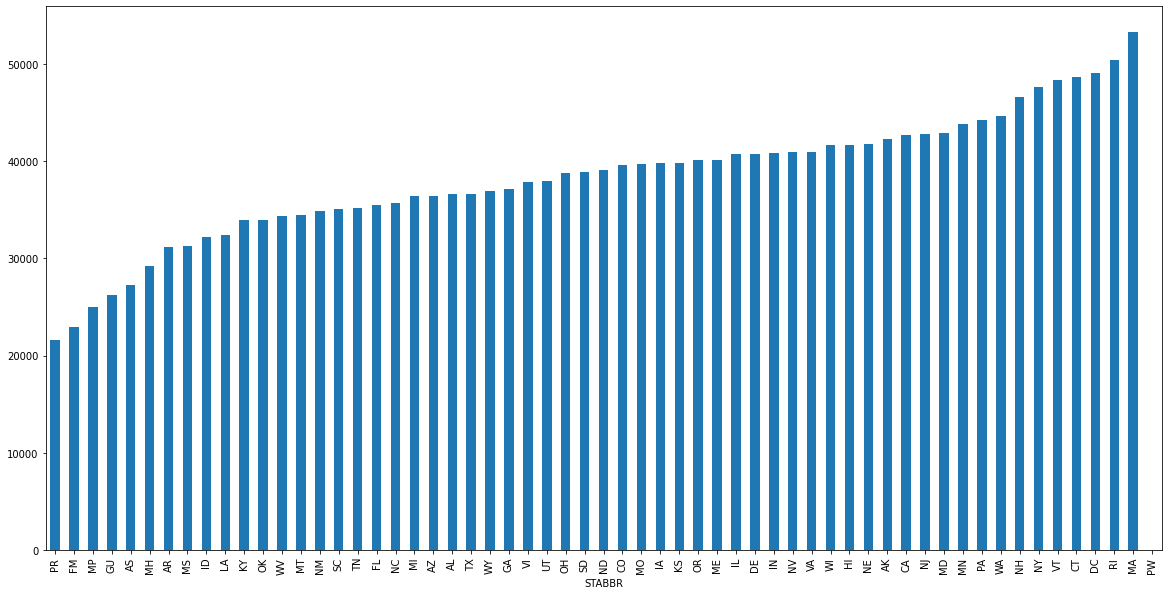

In [34]:
# Create a bar plot for the average amount earned, per state, sorted by ascending pay

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10'].mean().sort_values().plot.bar(figsize=(20,10))

<AxesSubplot:>

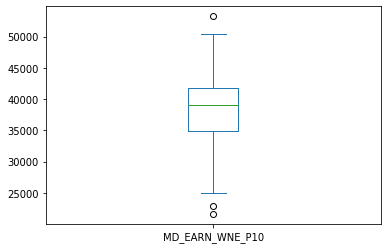

In [35]:
# Create a boxplot for the earnings by state.

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10'].mean().plot.box()